In [63]:
import pandas as pd
import numpy as np
from scipy import stats
import math

import seaborn as sns
sns.set_style("darkgrid")

import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# playerID       Player ID code
# yearID         Year
# stint          player's stint (order of appearances within a season)
# teamID         Team
# lgID           League
# G              Games
# AB             At Bats
# R              Runs
# H              Hits
# 2B             Doubles
# 3B             Triples
# HR             Homeruns
# RBI            Runs Batted In
# SB             Stolen Bases
# CS             Caught Stealing
# BB             Base on Balls
# SO             Strikeouts
# IBB            Intentional walks
# HBP            Hit by pitch
# SH             Sacrifice hits
# SF             Sacrifice flies
# GIDP           Grounded into double plays

In [3]:
# pd.set_option('display.max_columns', 50)
# pd.set_option('display.max_rows', 50)

In [4]:
juiced = pd.read_csv("juiced.csv")
steroids = pd.read_csv("steroids.csv")

In [5]:
def remove_unnamed(df):
    df.drop(['Unnamed: 0'], axis=1, inplace=True)
    return df

In [6]:
steroids = remove_unnamed(steroids)
steroids.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abnersh01,1990,1,SDN,NL,91,184,17,45,9,...,15.0,2.0,3.0,9,28.0,1.0,2.0,2.0,1.0,3.0
1,aldremi01,1990,1,MON,NL,96,161,22,39,7,...,18.0,1.0,2.0,37,31.0,2.0,1.0,0.0,1.0,2.0
2,alomaro01,1990,1,SDN,NL,147,586,80,168,27,...,60.0,24.0,7.0,48,72.0,1.0,2.0,5.0,5.0,16.0
3,alomasa02,1990,1,CLE,AL,132,445,60,129,26,...,66.0,4.0,1.0,25,46.0,2.0,2.0,5.0,6.0,10.0
4,anderbr01,1990,1,BAL,AL,89,234,24,54,5,...,24.0,15.0,2.0,31,46.0,2.0,5.0,4.0,5.0,4.0


In [7]:
juiced = remove_unnamed(juiced)
juiced.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abreubo01,2014,1,NYN,NL,78,133,12,33,9,...,14.0,1.0,0.0,20,21.0,0.0,0.0,0.0,2.0,3.0
1,abreujo02,2014,1,CHA,AL,145,556,80,176,35,...,107.0,3.0,1.0,51,131.0,15.0,11.0,0.0,4.0,14.0
2,ackledu01,2014,1,SEA,AL,143,502,64,123,27,...,65.0,8.0,4.0,32,90.0,1.0,3.0,3.0,2.0,10.0
3,adamsma01,2014,1,SLN,NL,142,527,55,152,34,...,68.0,3.0,2.0,26,114.0,5.0,3.0,0.0,7.0,9.0
4,adducji02,2014,1,TEX,AL,44,101,13,17,3,...,8.0,3.0,1.0,10,27.0,0.0,0.0,1.0,2.0,2.0


In [8]:
print("Steroid Mean: {} \nSteroid StDev: {} \nJuice Mean: {} \nJuice StDev: {}".format(steroids.HR.mean(), 
                                                                                     juiced.HR.mean(),
                                                                                     steroids.HR.std(), 
                                                                                     juiced.HR.std()))

Steroid Mean: 10.395577820003455 
Steroid StDev: 11.461712732215677 
Juice Mean: 10.122573994956918 
Juice StDev: 9.532654065338109


In [9]:
t_stat, p_value = stats.ttest_ind(steroids['H'], juiced['H'], equal_var=False)

In [10]:
t_stat, p_value

(2.4493457342387512, 0.014352816461711874)

In [11]:
def t_stat_p_val_1(col_name):
    t_stat, p_value = stats.ttest_ind(steroids[col_name], juiced[col_name], equal_var=False)
    print('T-Stat: {} \nP-Value: {}'.format(t_stat, p_value))

In [12]:
def t_stat_p_val_2(col_name):
    t_stat, p_value = stats.ttest_ind(juiced[col_name], steroids[col_name], equal_var=False)
    print('T-Stat: {} \nP-Value: {}'.format(t_stat, p_value))

In [13]:
t_stat_p_val_1('H') #hits

T-Stat: 2.4493457342387512 
P-Value: 0.014352816461711874


In [14]:
t_stat_p_val_1('2B') #doubles

T-Stat: -0.023326832269210052 
P-Value: 0.9813907017728931


In [15]:
t_stat_p_val_1('HR') #home runs 

T-Stat: -4.393886471217105 
P-Value: 1.1407979205065639e-05


In [16]:
t_stat_p_val_1('SO') #strike outs 

T-Stat: -20.137596547351038 
P-Value: 2.4730525003046932e-85


In [17]:
#critical value 
deg = len(steroids) + len(juiced) - 2
crit_val = np.round(stats.t.ppf(1-0.05, df=deg), 5)
crit_val

1.64504

### *Ho*: Steroid Era players were better hitters

### *Ha*: Steroid Era players were not better hitters  

In [18]:
colname = 'H'
print("Steroid Mean: {} \nSteroid StDev: {} \nJuice Mean: {} \nJuice StDev: {}".format(steroids[colname].mean(), 
                                                                                     juiced[colname].mean(),
                                                                                     steroids[colname].std(), 
                                                                                     juiced[colname].std()))

Steroid Mean: 91.83036793919503 
Steroid StDev: 88.87902129587675 
Juice Mean: 49.55414799492732 
Juice StDev: 47.62552578782344


In [19]:
#Hit to At Bat ratio (batting avg)
juiced['AVG'] = juiced['H'] / juiced['AB']
steroids['AVG'] = steroids['H'] / steroids['AB'] 

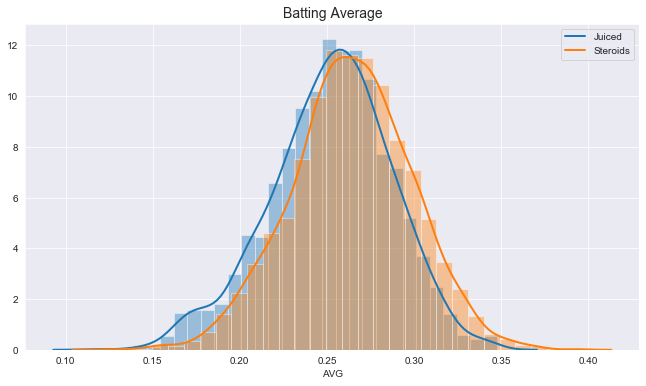

In [20]:
plt.figure(figsize=(11,6))
sns.distplot(juiced['AVG'], bins=30,kde_kws={"lw": 2, "label": "Juiced"})
sns.distplot(steroids['AVG'], bins=30,kde_kws={"lw": 2, "label": "Steroids"})
plt.title("Batting Average", fontsize=14);

In [21]:
t_stat_p_val_1('AVG')

T-Stat: 13.70934931371592 
P-Value: 7.8742099225483e-42


In [22]:
colname = 'H'
t_stat, p_value = stats.ttest_ind(steroids[colname], juiced[colname], equal_var=False)
t_stat, p_value

(2.4493457342387512, 0.014352816461711874)

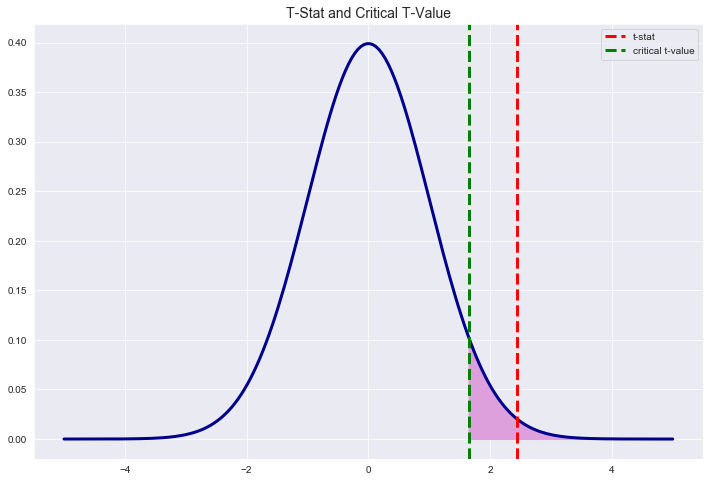

In [23]:
xs = np.linspace(-5, 5, 200)
ys = stats.t.pdf(xs, deg, 0, 1)

fig = plt.figure(figsize=(12,8))

ax = fig.gca()

ax.plot(xs, ys, linewidth=3, color='darkblue')

ax.axvline(t_stat, color='red', linestyle='--', lw=3,label='t-stat')

ax.axvline(crit_val,color='green',linestyle='--',lw=3,label='critical t-value')

ax.fill_betweenx(ys,xs,crit_val,where = xs > crit_val, color = 'plum')
plt.title('T-Stat and Critical T-Value', fontsize=14)
ax.legend()
plt.show()

### *Ho*: National League players have better batting averages

### *Ha*: American League players have better batting averages

In [24]:
NLSter = steroids[steroids['lgID']=='NL']
ALSter = steroids[steroids['lgID']=='AL']

NLJuice = juiced[juiced['lgID']=='NL']
ALJuice = juiced[juiced['lgID']=='AL']

In [25]:
NL = pd.concat([NLSter, NLJuice], ignore_index=True)
AL = pd.concat([ALSter, ALJuice], ignore_index=True)

In [26]:
print("NL Mean: {} \nNL StDev: {} \nAL Mean {} \nAL StDev: {}".format(NL.AVG.mean(),
                                                                  NL.AVG.std(),
                                                                  AL.AVG.mean(), 
                                                                  AL.AVG.std()))

NL Mean: 0.26161966136046516 
NL StDev: 0.03573001555296526 
AL Mean 0.2600010153517902 
AL StDev: 0.03508127199382807


In [27]:
#critical value 
league_deg = len(AL) + len(NL) - 2
league_crit_val = np.round(stats.t.ppf(1-0.05, df=league_deg), 5)
league_crit_val

1.64504

In [28]:
colname = 'AVG'
t_stat_2, p_value_2 = stats.ttest_ind(NL[colname], AL[colname], equal_var=False)
t_stat_2, p_value_2

(2.043912227022809, 0.0409949361619532)

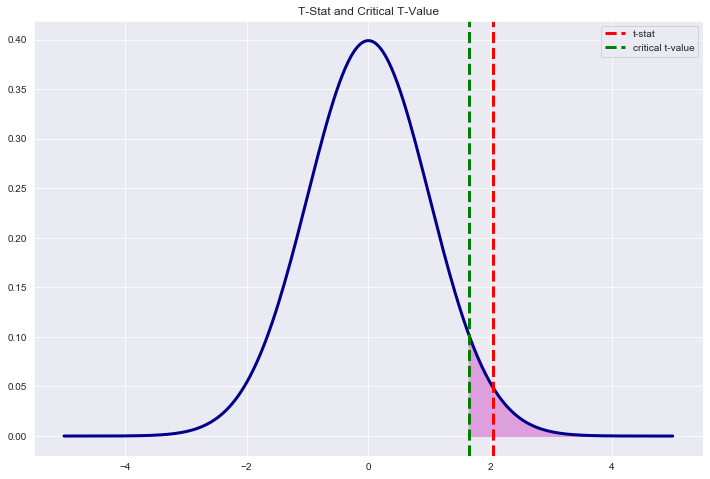

In [29]:
xs = np.linspace(-5, 5, 200)
ys = stats.t.pdf(xs, deg, 0, 1)

fig = plt.figure(figsize=(12,8))

ax = fig.gca()

ax.plot(xs, ys, linewidth=3, color='darkblue')

ax.axvline(t_stat_2, color='red', linestyle='--', lw=3,label='t-stat')

ax.axvline(league_crit_val,color='green',linestyle='--',lw=3,label='critical t-value')

ax.fill_betweenx(ys,xs,league_crit_val,where = xs > league_crit_val, color = 'plum')
plt.title('T-Stat and Critical T-Value')
ax.legend()
plt.show()

### Home runs and stike outs?

In [30]:
print('Steroid Strikeout Mean: {}\nSteroid Stikeout StDev: {}\n'.format(steroids.SO.mean(), 
                                                                           steroids.SO.std()))

print('Juiced Strikeout Mean: {}\nJuied Stikeout StDev: {}'.format(juiced.SO.mean(), 
                                                                           juiced.SO.std()))

Steroid Strikeout Mean: 58.79979271031266
Steroid Stikeout StDev: 32.43454138310608

Juiced Strikeout Mean: 77.61169007702765
Juied Stikeout StDev: 39.05019329957749


In [31]:
#Bonds strikeout Z-score
(93 - steroids.SO.mean())/steroids.SO.std()

1.0544378255800135

In [32]:
#Stantons strikeout Z-score
(163 - juiced.SO.mean())/juiced.SO.std()

2.1866296350419407

In [33]:
steroids.loc[steroids['HR'].idxmax()] #Barry Bonds

playerID    bondsba01
yearID           2001
stint               1
teamID            SFN
lgID               NL
G                 153
AB                476
R                 129
H                 156
2B                 32
3B                  2
HR                 73
RBI               137
SB                 13
CS                  3
BB                177
SO                 93
IBB                35
HBP                 9
SH                  0
SF                  2
GIDP                5
AVG          0.327731
Name: 4506, dtype: object

In [34]:
 juiced.loc[juiced['HR'].idxmax()] #Mike (Giancarlo) Stanton

playerID    stantmi03
yearID           2017
stint               1
teamID            MIA
lgID               NL
G                 159
AB                597
R                 123
H                 168
2B                 32
3B                  0
HR                 59
RBI               132
SB                  2
CS                  2
BB                 85
SO                163
IBB                13
HBP                 7
SH                  0
SF                  3
GIDP               13
AVG          0.281407
Name: 1704, dtype: object

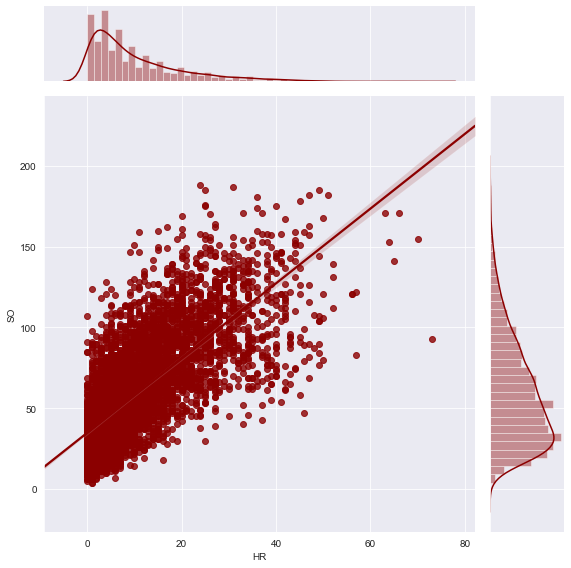

In [35]:
sns.jointplot(x='HR', y='SO', data=steroids, kind='reg', height=8, color='darkred');

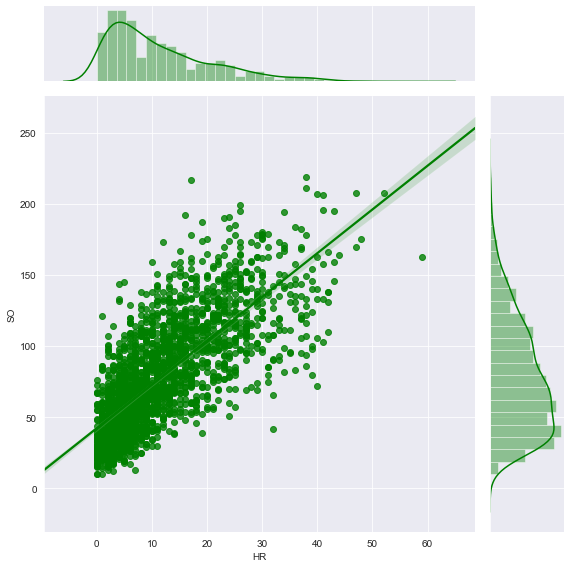

In [36]:
sns.jointplot(x='HR', y='SO', data=juiced, kind='reg', height=8, color='green');

In [37]:
#critical value 
deg = len(steroids) + len(juiced) - 2
crit_val = np.round(stats.t.ppf(1-0.05, df=deg), 5)
crit_val

1.64504

In [41]:
colname = '2B'
t_stat_3, p_value_3 = stats.ttest_ind(steroids[colname], juiced[colname])
t_stat_3, p_value_3

(-0.02299052460481848, 0.9816584050390822)

In [39]:
juiced['SOHR']  = juiced['HR']/juiced['SO']

In [40]:
steroids['SOHR'] = steroids['HR']/steroids['SO']

In [52]:
steroids.groupby('yearID').sum()

,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,AVG,SOHR
yearID,,,,,,,,,,,,,,,,,,,,
1990,396,41038,130451,16732,34470,6119,814,3179,15826.0,3132.0,1434.0,12958,20713.0,1328.0,785.0,993.0,1181.0,2838.0,97.177074,52.115735
1991,402,41761,131624,17173,34473,6162,853,3287,16202.0,2985.0,1494.0,13161,21408.0,1187.0,858.0,1090.0,1187.0,2816.0,97.927028,52.570329
1992,401,40910,131159,16303,34322,6212,802,2919,15438.0,3131.0,1502.0,12953,20585.0,1276.0,925.0,1090.0,1223.0,2898.0,98.171109,48.828193
1993,410,43085,141023,19542,38324,6985,891,3826,18398.0,3138.0,1571.0,14162,22689.0,1432.0,1127.0,1076.0,1338.0,3171.0,105.107705,63.436545
1994,363,29790,99765,14689,27539,5315,646,3138,13899.0,2171.0,971.0,10406,17051.0,976.0,811.0,705.0,924.0,2224.0,96.304801,61.770397
1995,412,38154,124776,18172,34229,6468,766,3882,17189.0,2802.0,1181.0,13130,21721.0,1060.0,1129.0,850.0,1081.0,2881.0,105.623944,65.370970
1996,438,43332,142469,21347,39434,7456,808,4744,20225.0,3073.0,1243.0,15016,25361.0,1302.0,1294.0,876.0,1304.0,3351.0,110.410215,69.538758
1997,450,43899,142585,20340,38930,7572,826,4452,19310.0,3169.0,1499.0,14774,26168.0,1134.0,1362.0,950.0,1311.0,3214.0,112.813754,66.364371
1998,475,46986,153208,21880,41785,8215,847,4874,20897.0,3131.0,1424.0,15466,27821.0,1046.0,1495.0,986.0,1339.0,3436.0,116.895302,70.292845


In [54]:
juiced.groupby('yearID').sum()

,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,AVG,SOHR
yearID,,,,,,,,,,,,,,,,,,,,
2014,462,45453,150845,18493,38901,7643,799,3988,17605.0,2626.0,981.0,13140,32721.0,951.0,1526.0,694.0,1197.0,3312.0,110.535948,49.155459
2015,471,45428,150390,19282,39298,7733,888,4680,18506.0,2351.0,994.0,13088,32555.0,906.0,1482.0,614.0,1167.0,3464.0,111.969929,59.466336
2016,452,45838,151836,20476,39696,7788,821,5412,19613.0,2421.0,937.0,14204,34443.0,911.0,1548.0,495.0,1144.0,3446.0,110.842242,63.141660
2017,461,45663,151637,21276,39684,7953,738,5873,20379.0,2413.0,877.0,14855,35293.0,935.0,1654.0,387.0,1095.0,3532.0,111.693244,68.381794
2018,478,46018,151755,20375,38577,7804,802,5343,19466.0,2355.0,912.0,14740,36277.0,913.0,1812.0,376.0,1152.0,3190.0,111.349688,62.499037
